# Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:

# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

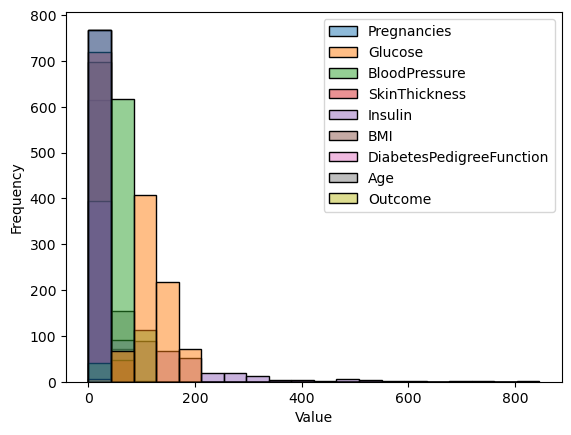

In [8]:
sns.histplot(df, bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

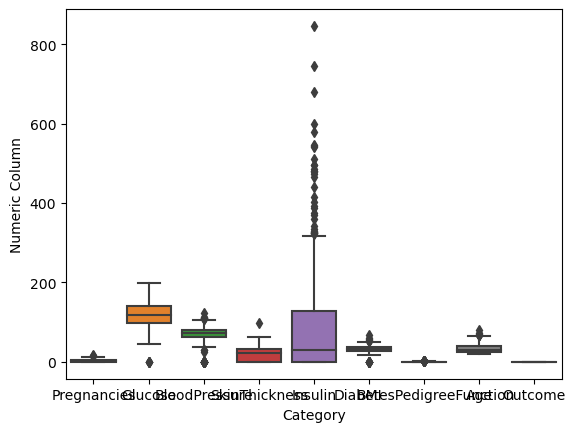

In [14]:
sns.boxplot(df)
plt.xlabel('Category')
plt.ylabel('Numeric Column')
plt.show()

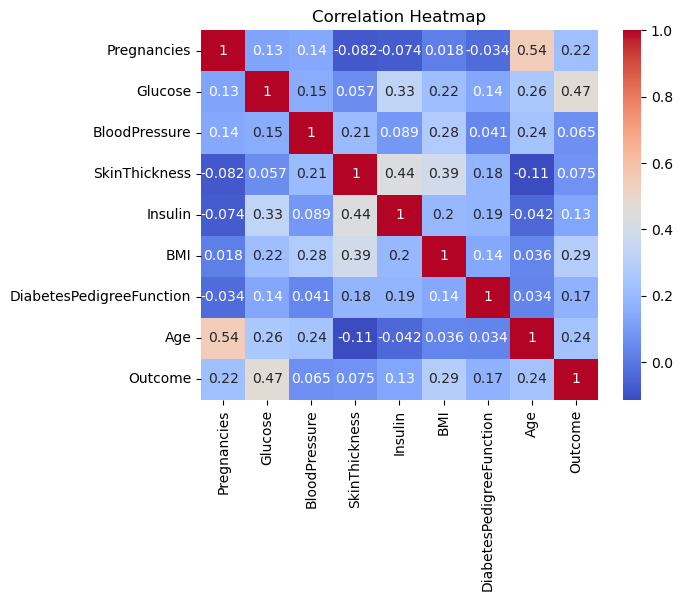

In [10]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [12]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [15]:
# Removing Outliers
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Insulin'] >= lower_bound) & (df['Insulin'] <= upper_bound)]


# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [21]:
X=df.iloc[:,:-1]
y = df['Outcome']

In [25]:
X,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

In [26]:
from sklearn.model_selection import train_test_split

# Specify a random seed for reproducibility
random_seed = 42

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# X_train: Features for training
# X_test: Features for testing
# y_train: Target values for training
# y_test: Target values for testing


# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a DecisionTreeClassifier instance
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required for a leaf node
}

# Create a GridSearchCV instance for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)  # 5-fold cross-validation

# Fit the model to the training data (perform hyperparameter tuning)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the decision tree model with the best hyperparameters on the entire training set
best_dt_classifier = DecisionTreeClassifier(random_state=42, **best_params)
best_dt_classifier.fit(X_train, y_train)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, random_state=42)

# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Accuracy: 0.7210884353741497
Precision: 0.5660377358490566
Recall: 0.625
F1 Score: 0.594059405940594
Confusion Matrix:
[[76 23]
 [18 30]]


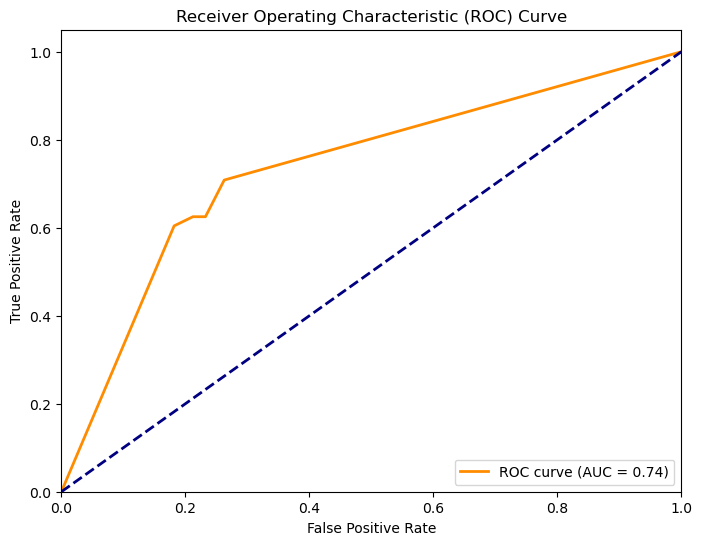

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate ROC curve and AUC
y_prob = best_dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

In [31]:
treeclassifier = DecisionTreeClassifier()

In [32]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.4374407770056854, 0.9666666666666667, 'x[1] <= 127.5\ngini = 0.45\nsamples = 587\nvalue = [386, 201]'),
 Text(0.20147662665824384, 0.9, 'x[7] <= 28.5\ngini = 0.305\nsamples = 384\nvalue = [312, 72]'),
 Text(0.10739102969046115, 0.8333333333333334, 'x[5] <= 45.4\ngini = 0.153\nsamples = 216\nvalue = [198, 18]'),
 Text(0.06822488945041061, 0.7666666666666667, 'x[5] <= 30.95\ngini = 0.131\nsamples = 212\nvalue = [197, 15]'),
 Text(0.02021478205938092, 0.7, 'x[6] <= 0.672\ngini = 0.017\nsamples = 120\nvalue = [119, 1]'),
 Text(0.01010739102969046, 0.6333333333333333, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(0.030322173089071383, 0.6333333333333333, 'x[0] <= 2.5\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.02021478205938092, 0.5666666666666667, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.04042956411876184, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1162349968414403, 0.7, 'x[2] <= 53.0\ngini = 0.258\nsamples = 92\nvalue =

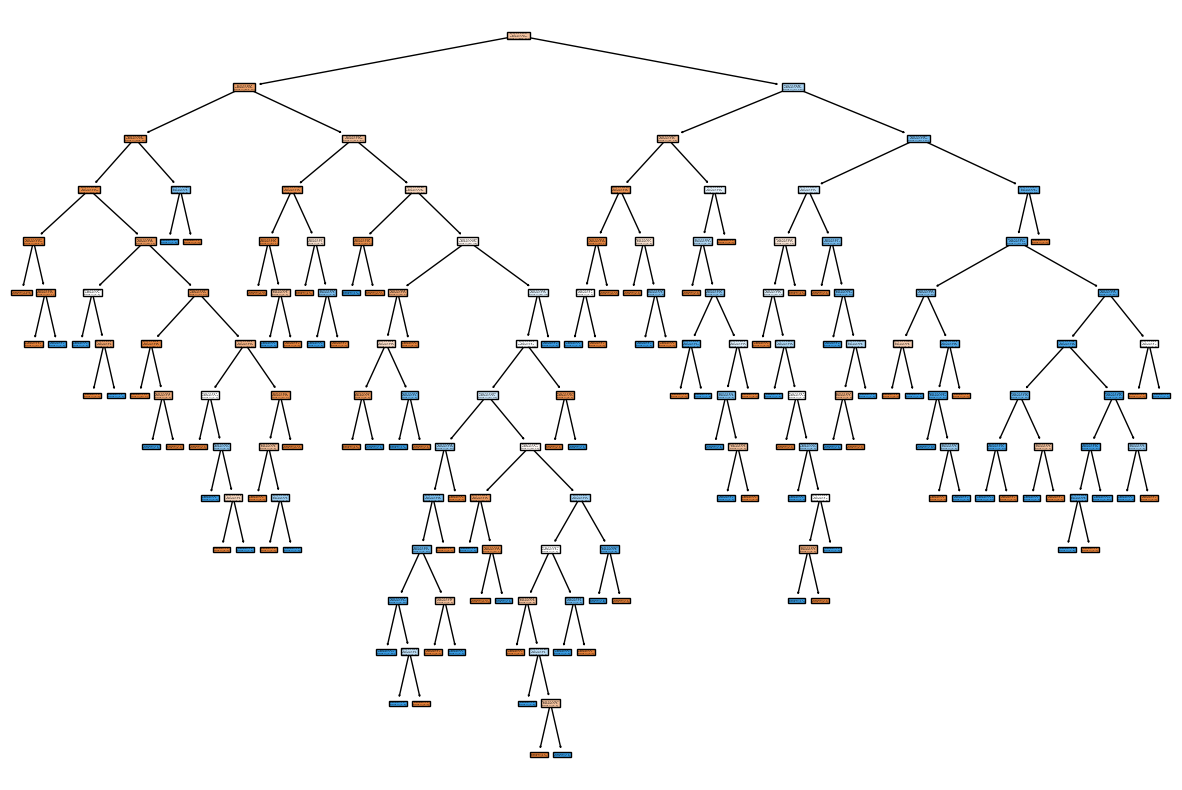

In [33]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(treeclassifier, filled = True)

# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

Interpreting a decision tree involves examining the splits, branches, and leaves to understand how the model makes decisions. You can identify the most important variables and their thresholds by tracing the path from the root node to the leaves and analyzing the patterns and trends. Let's break down the interpretation process step by step:

1. **Root Node**: Start by looking at the root node of the decision tree. This node represents the first split, and the variable used for this split is often one of the most important variables in the model. In your decision tree model, the root node represents the initial condition or feature that has the most discriminatory power.

2. **Internal Nodes (Branches)**: As you move down the tree, each internal node represents a decision point based on a feature and a threshold. Pay attention to the features selected and their thresholds. These decisions determine how the tree splits the data into different branches.

3. **Leaves**: The leaves of the decision tree represent the final predicted class or outcome for the observations that reach them. Each leaf may have a majority class label or a class probability distribution.

4. **Variable Importance**: The importance of a variable can be inferred from how often it is used in the splits and how high up in the tree it appears. Variables used near the top of the tree and in multiple splits are generally more important.

5. **Thresholds**: Thresholds for continuous variables indicate the value at which the variable is split. Understanding these thresholds can provide insights into how the model categorizes or differentiates data.

6. **Patterns and Trends**: To interpret the patterns and trends, consider the following:
   - Are there certain variables or conditions that consistently lead to a specific outcome or class?
   - Do the splits and thresholds align with your domain knowledge or intuition about the problem?
   - Are there any unexpected or counterintuitive patterns that might warrant further investigation?

7. **Pruning**: Decision trees can become quite complex, and some branches may be based on noise in the data. Pruning techniques can help simplify the tree by removing branches that do not significantly improve predictive performance.

8. **Visualizations**: Visualizing the decision tree can be extremely helpful. You can use libraries like `graphviz` to create a graphical representation of the tree, making it easier to explore and interpret.

9. **Domain Knowledge**: Incorporate your domain knowledge and common sense when interpreting the decision tree. Ask yourself if the tree's decisions make sense in the context of the problem you're trying to solve.

10. **Cross-Validation**: To ensure the robustness of your interpretations, consider using cross-validation to assess the stability of the decision tree's structure and the consistency of variable importance rankings.

Remember that decision trees are interpretable models by design, and their simplicity makes them suitable for understanding the logic behind predictions. By carefully examining the splits, branches, and leaves, you can gain valuable insights into how the model is making decisions and which variables are most influential in your specific problem.

# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

Validating a decision tree model involves assessing its performance on new or unseen data and testing its robustness under different conditions to evaluate its reliability. Sensitivity analysis and scenario testing can help explore uncertainties and risks associated with the model. Here's how you can approach model validation and testing:

1. **Hold-Out Validation**:
   - Apply the trained decision tree model to a completely new dataset (not used during training or testing) to evaluate its performance on unseen data. This is often referred to as a "hold-out" dataset or validation set.

2. **Cross-Validation**:
   - Perform k-fold cross-validation on your dataset to assess the model's stability and generalization performance. Cross-validation helps estimate how well the model will perform on new data.

3. **Sensitivity Analysis**:
   - Vary the values of key input variables or parameters within a reasonable range to assess how sensitive the model's predictions are to changes in these inputs.
   - For example, if your decision tree is used for financial predictions, you might perform sensitivity analysis by varying interest rates, inflation rates, or other economic variables to understand how changes in these factors affect your model's predictions.

4. **Scenario Testing**:
   - Define and test different scenarios or hypothetical situations that your model might encounter. This can help assess how well the model adapts to varying conditions.
   - For example, if your decision tree is used for predicting customer churn, you can create scenarios where different customer segments behave differently (e.g., high churn, low churn, or seasonal variations) and evaluate the model's performance under each scenario.

5. **Robustness Testing**:
   - Introduce noise or anomalies into the data to test how well the model handles unexpected variations or outliers.
   - Assess the model's ability to generalize by making small changes to the training data, such as adding noise or modifying features.

6. **Change Detection**:
   - Continuously monitor the performance of the model in a production environment and set up mechanisms to detect significant deviations from expected behavior. This can help identify when the model's assumptions or the underlying data have changed.

7. **Performance Metrics**:
   - Use appropriate performance metrics for validation, such as accuracy, precision, recall, F1 score, or area under the ROC curve (AUC), depending on the nature of your problem.

8. **Reevaluation and Retraining**:
   - Regularly reevaluate and, if necessary, retrain your decision tree model using updated data to ensure its continued relevance and accuracy.

9. **Documentation and Reporting**:
   - Document the results of your validation and testing procedures, including any findings related to sensitivity, scenarios, or risks.
   - Communicate the model's performance and any identified limitations to stakeholders.

10. **Feedback Loop**:
    - Establish a feedback loop with domain experts and end-users to gather insights and feedback about the model's performance and any unexpected behaviors.

11. **Model Monitoring**:
    - Implement ongoing model monitoring and maintenance practices to ensure the model's effectiveness and safety in real-world applications.